In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import json
import random

# Visualize the Job Data
First load the jobs data from the job_data.json file located in the MSU\ REU/Data/ folder\
Additionally, set the start time, end time and batch size of the jobs. These parameters will filter out the jobs.

In [2]:
path = '../../Data/job_data.json'
with open(path, 'r') as file:
    data = json.load(file)

start_time = 0
end_time = 1440
batch_size = 500


Get a random selection of the jobs from the larager jobs data set

In [3]:
# Randomly shuffle the jobs so that there is variation between trials
jobs = data['jobs']
random.shuffle(jobs)

job_array = []

# Iterate through the job objects and create an array of objects that fall within the specified time window
for i in range(batch_size):
    aj = jobs[i]['release']
    dj = jobs[i]['deadline']

    # Check if the specific job lies within the correct window
    # The funky syntax is used to put the job id at the very front of the dictionary
    if aj >= start_time and dj <= end_time:
        job_id = {'job_id' : i}
        job_array.append({**job_id, **jobs[i]})

Generate the X-axis and Y-axis values for the line graph

In [4]:
time_array = [0 for _ in range(1440)]
for job_object in job_array:
    aj = job_object['release']
    dj = job_object['deadline']
    lj = job_object['length']
    hj = job_object['height']

    for i in range(aj, aj + lj + 1):
        time_array[i] += (hj / 800)

job_graph_xvalues = np.array([i for i in range(1440)])
job_graph_yvalues = np.array(time_array)

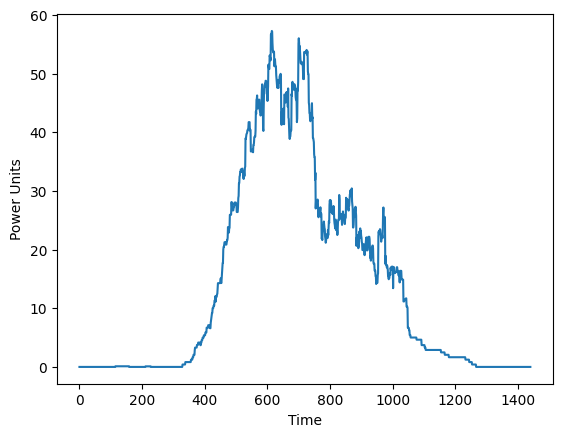

In [5]:
plt.plot(job_graph_xvalues, job_graph_yvalues)

plt.xlabel("Time")
plt.ylabel("Power Units")

plt.show()

# Visualize Solar Energy Data

In [6]:
path = '../../Data/solar_data.json'
with open(path, 'r') as file:
    data = json.load(file)

In [7]:
solar_array = []
solar_energy = data['series'][0]['data']

for i in range(24):
    solar_array.append(solar_energy[i]['value'])


arr = [solar_array[ i // 60 ] for i in range(1440)]

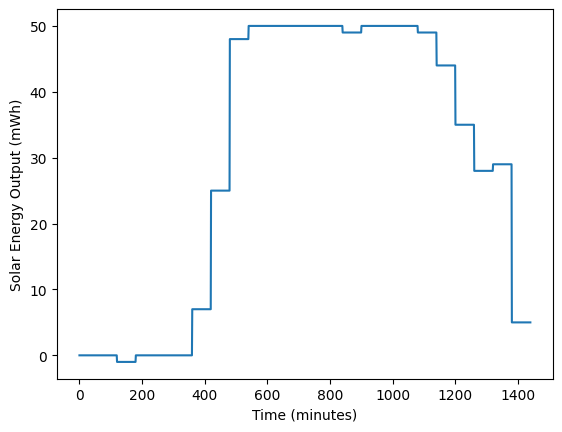

In [8]:
solar_graph_xvalues = np.array([i for i in range(24 * 60)])
solar_graph_yvalues = np.array(arr)

plt.plot(solar_graph_xvalues, solar_graph_yvalues)

plt.xlabel("Time (minutes)")
plt.ylabel("Solar Energy Output (mWh)")

plt.show()

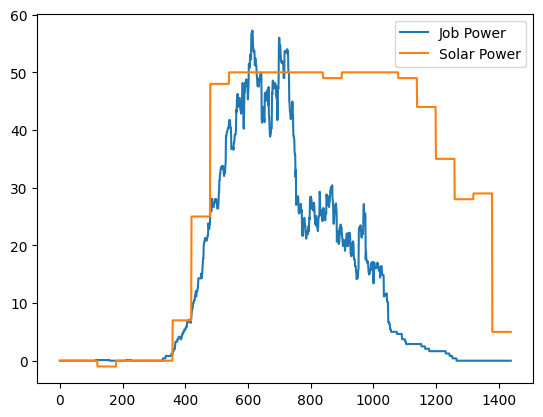

In [9]:
plt.plot(job_graph_xvalues, job_graph_yvalues, label='Job Power')
plt.plot(solar_graph_xvalues, solar_graph_yvalues, label='Solar Power')
plt.legend()
plt.show()